#**Nearest Earth Objects(NEO) Assessor**

Imports the library

In [187]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Establish a Google Drive connection

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Collection**

Dataset is downloaded from here: https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/data

In [189]:
data=pd.read_csv("/content/drive/MyDrive/NASA- nearest-earth-objects(1910-2024).csv")
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [191]:
data.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [192]:
data.shape

(338199, 9)

## **Data preprocessing**

**Data Cleaning**

Drop the duplication data

In [193]:
print("{} rows are same".format(data.duplicated().sum()))

0 rows are same


Handle null values

In [194]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [195]:
data.dropna(inplace=True)

In [196]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


Drop features that are not required based on domain knowledge.

In [197]:
data.drop(['neo_id', 'name', 'orbiting_body' ], axis=1, inplace=True)

In [198]:
data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


Label Encoding

In [199]:
label_encoder = LabelEncoder()
data['is_hazardous']= label_encoder.fit_transform(data['is_hazardous'])
data.head()


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


## **Descriptive Statistical Analysis**

In [200]:
data.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
count,338171.000000,338171.000000,338171.000000,338171.000000,3.381710e+05,338171.000000
mean,22.932525,0.157812,0.352878,51060.017994,4.153547e+07,0.127634
std,2.911216,0.313885,0.701869,26399.922830,2.077411e+07,0.333682
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03,0.000000
25%,20.740000,0.025384,0.056760,30710.626399,2.494495e+07,0.000000
50%,22.800000,0.073207,0.163697,47557.046397,4.332724e+07,0.000000
75%,25.100000,0.189041,0.422708,66673.223798,5.933961e+07,0.000000
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07,1.000000


## **Visual Analysis**

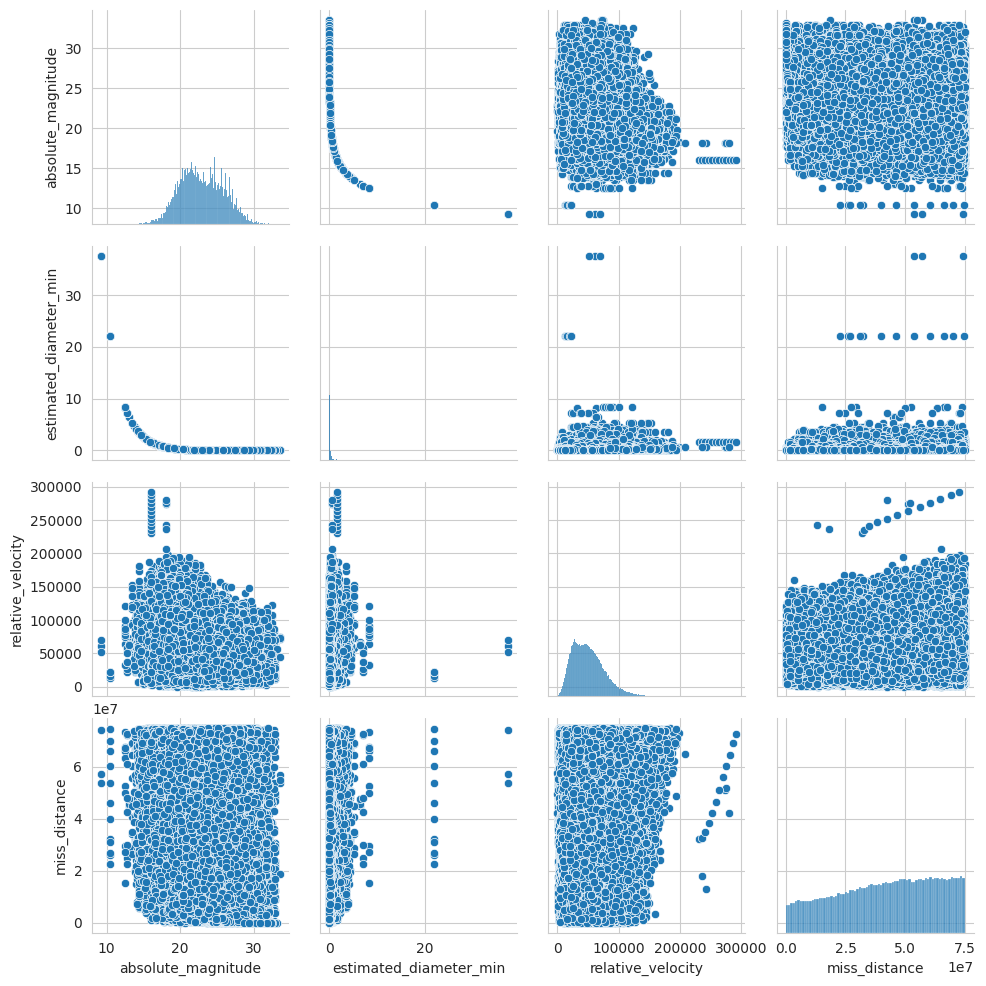

In [201]:
sns.pairplot(data, vars=['absolute_magnitude', 'estimated_diameter_min', 'relative_velocity', 'miss_distance'])
plt.show()

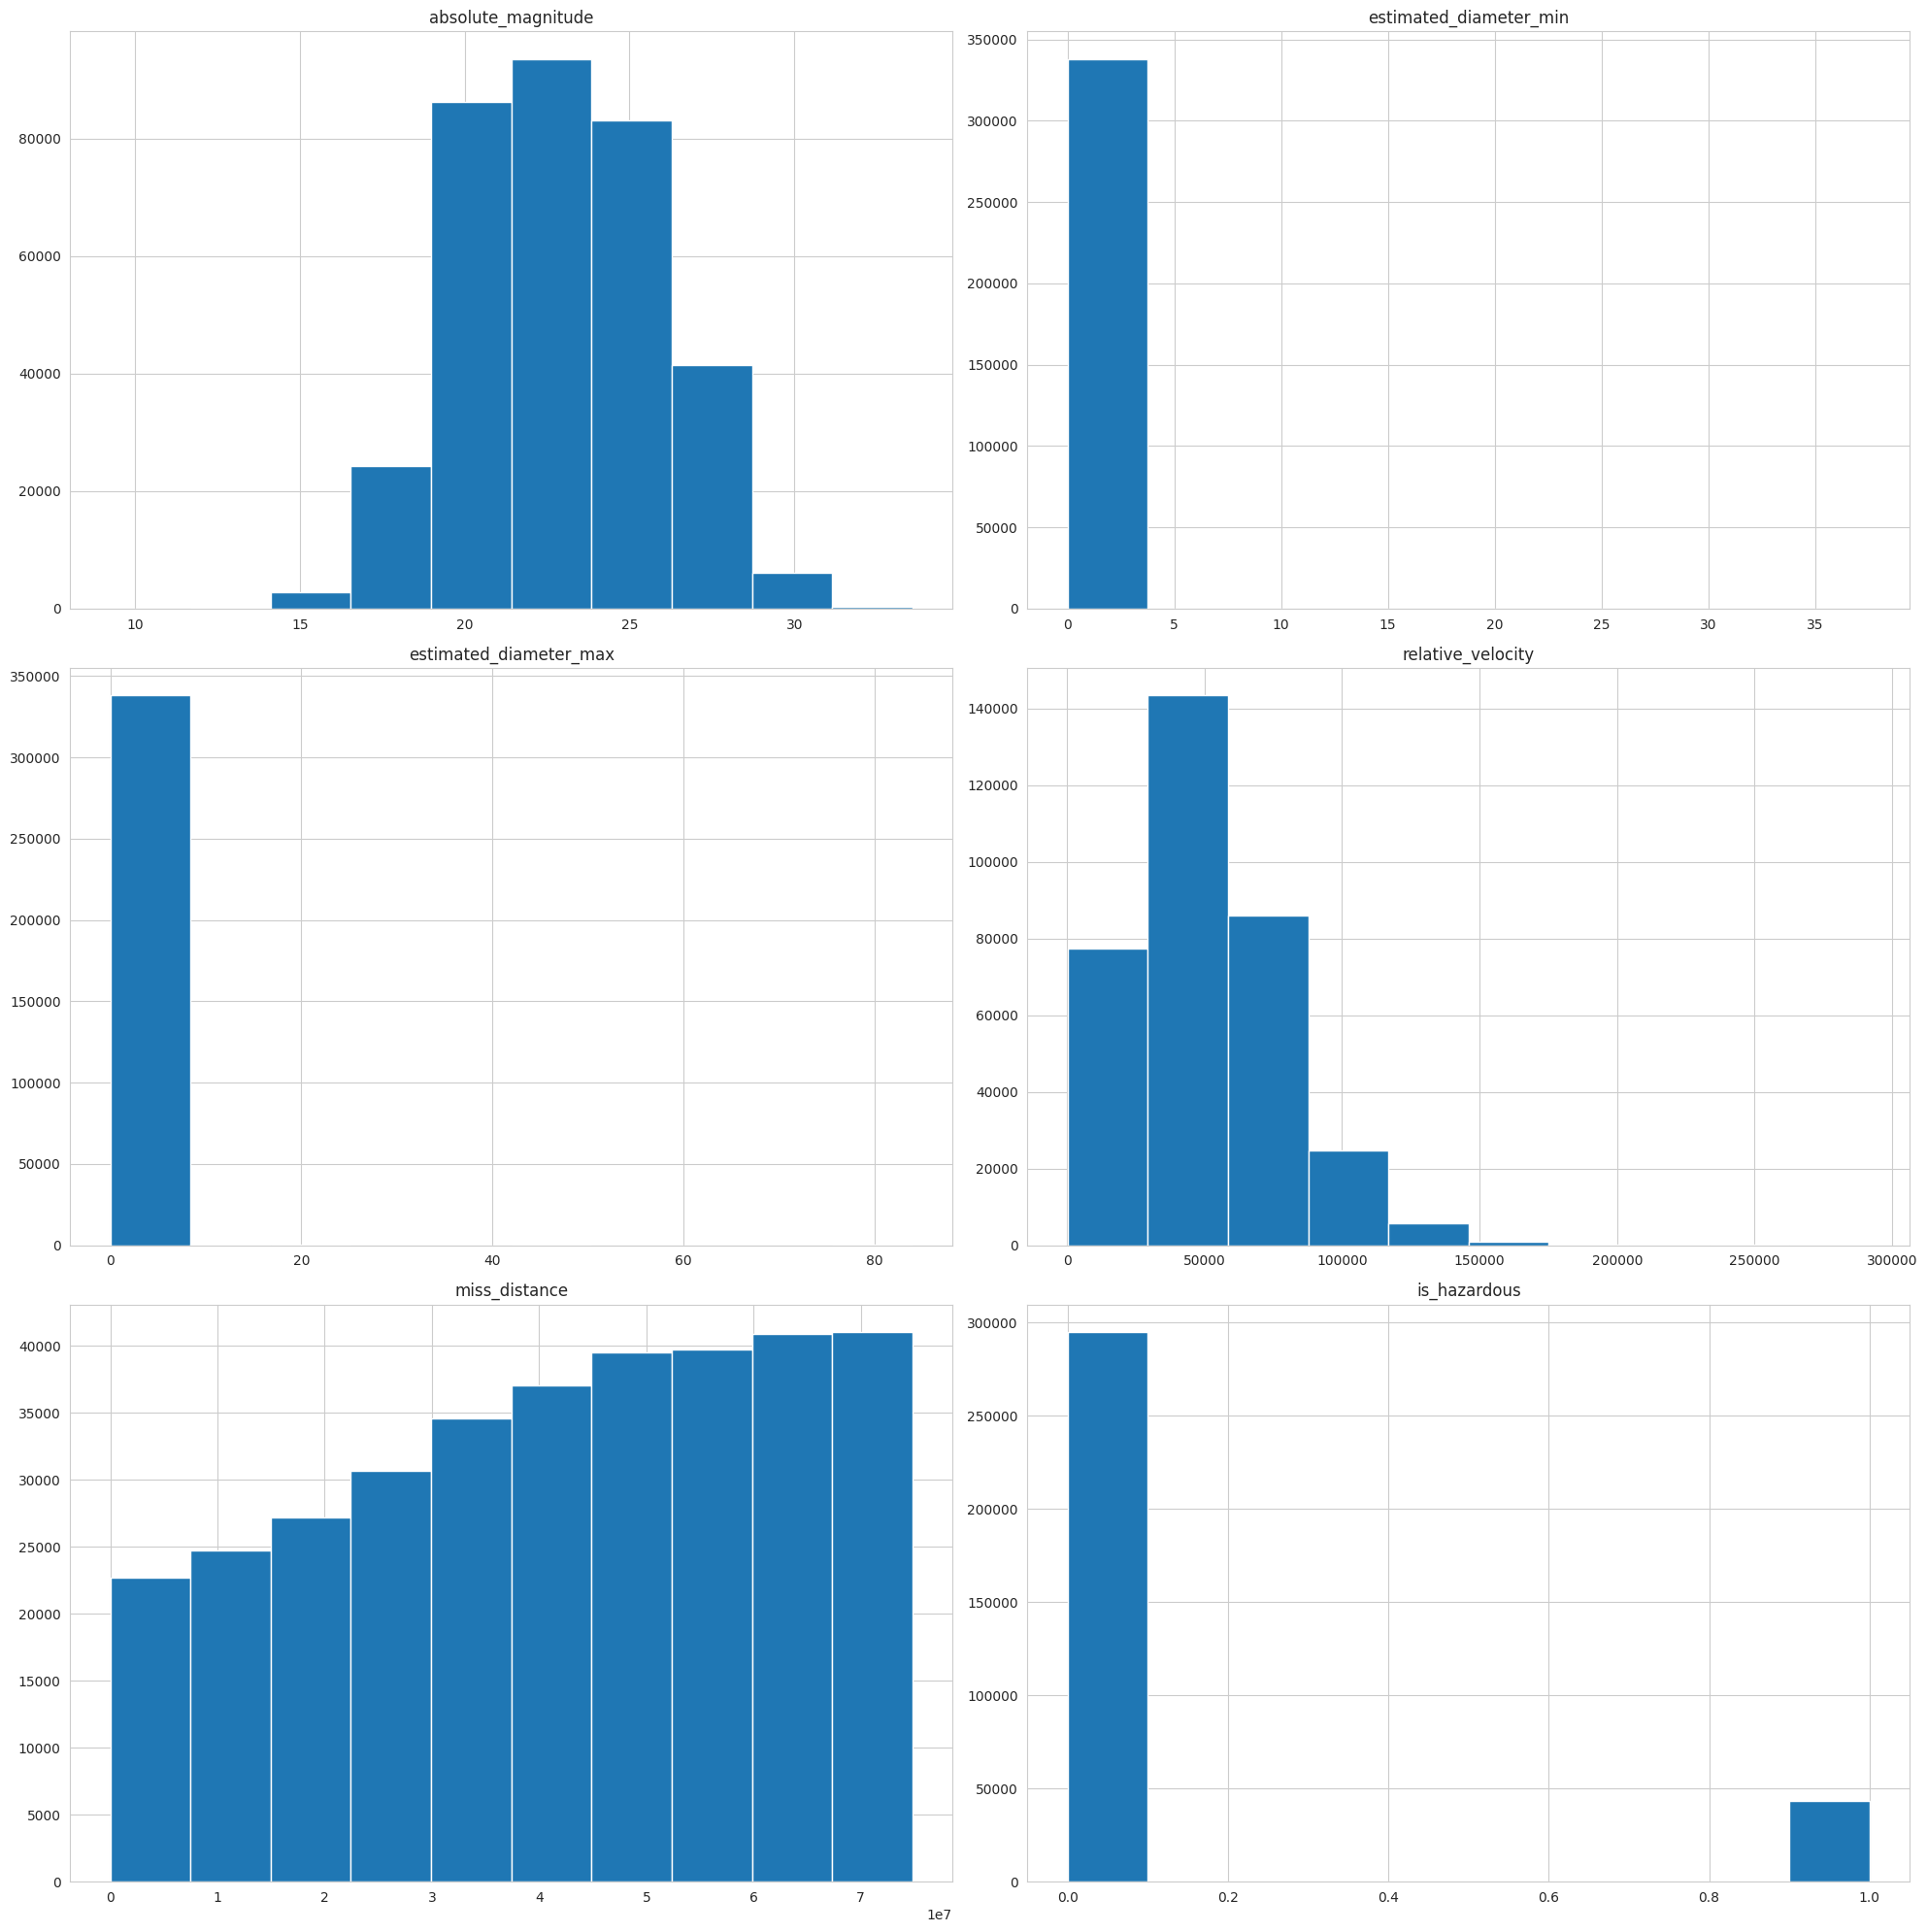

In [202]:
data.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

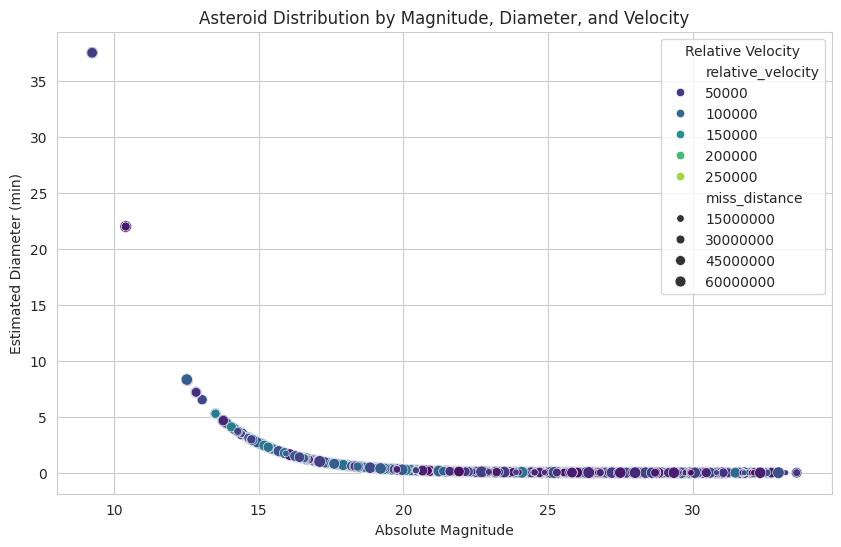

In [203]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x='absolute_magnitude', y='estimated_diameter_min', data=data, hue='relative_velocity', size='miss_distance', palette='viridis')
plt.title('Asteroid Distribution by Magnitude, Diameter, and Velocity')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Estimated Diameter (min)')
plt.legend(title='Relative Velocity')
plt.show()

## **Training**

Drop the target variable from the data

In [204]:
y = pd.DataFrame(data['is_hazardous'])
data.drop(['is_hazardous'],axis = 1,inplace=True)
print(data.shape)

(338171, 5)


Splitting the data

In [205]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)

In [206]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(236719, 5)
(101452, 5)
(236719, 1)
(101452, 1)


In [207]:
X_train.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
277938,22.30,0.092163,0.206082,44162.539999,5.229097e+07
328817,26.99,0.010631,0.023771,30311.547989,1.664544e+06
223697,18.80,0.461907,1.032856,100873.249980,6.147045e+07
120346,27.00,0.010582,0.023661,47542.368069,3.042171e+07
303917,21.24,0.150160,0.335769,39134.003383,1.936086e+07


## **Models**

RandomForestClassifier

In [208]:
rand_cl=RandomForestClassifier(n_estimators=100,random_state=42)

In [209]:
rand_cl.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [210]:
y_pred_nb_cla= rand_cl.predict(X_test)

NaiveBayes

In [211]:
#NaiveBayes
nb_cla = GaussianNB()
nb_cla.fit(X_train, y_train)
y_pred_nb_cla= nb_cla.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsClassifier

In [212]:
#KNeighborsClassifier
knn_cla = KNeighborsClassifier(n_neighbors=3)
knn_cla.fit(X_train, y_train)
y_pred_knn_cla = knn_cla.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## **Evaluation of the model**

In [213]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n")
        cm = confusion_matrix(y_train, pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n")
        cm = confusion_matrix(y_test, pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


Evaluation of NaiveBayes

#NaiveBayes
Train Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.874101      0.325287   0.86805       0.599694       0.803800
recall          0.991468      0.027999   0.86805       0.509733       0.868050
f1-score        0.929093      0.051559   0.86805       0.490326       0.816683
support    206396.000000  30323.000000   0.86805  236719.000000  236719.000000
_______________________________________________
Confusion Matrix: 



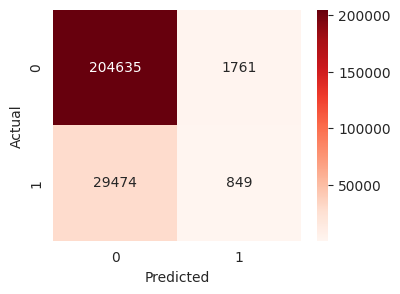

Test Result:
Accuracy Score: 86.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.875729      0.331839  0.869751       0.603784       0.806898
recall         0.991593      0.028818  0.869751       0.510206       0.869751
f1-score       0.930066      0.053031  0.869751       0.491549       0.819075
support    88613.000000  12839.000000  0.869751  101452.000000  101452.000000
_______________________________________________
Confusion Matrix: 



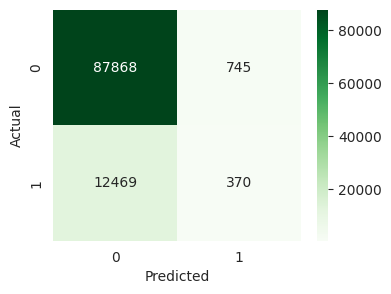

In [214]:
#NaiveBayes
print("#NaiveBayes")
print_score(nb_cla, X_train, y_train, X_test, y_test, train=True)
print_score(nb_cla, X_train, y_train, X_test, y_test, train=False)

Evaluation of KNeighborsClassifier

#KNeighborsClassifier
Train Result:
Accuracy Score: 89.73%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.909833      0.706674  0.897334       0.808254       0.883809
recall          0.979302      0.339412  0.897334       0.659357       0.897334
f1-score        0.943290      0.458574  0.897334       0.700932       0.881200
support    206396.000000  30323.000000  0.897334  236719.000000  236719.000000
_______________________________________________
Confusion Matrix: 



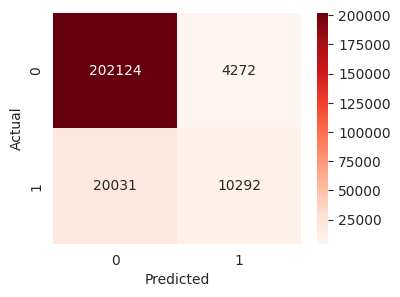

Test Result:
Accuracy Score: 84.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.880642      0.240846  0.842753       0.560744       0.799674
recall         0.948529      0.112703  0.842753       0.530616       0.842753
f1-score       0.913326      0.153552  0.842753       0.533439       0.817175
support    88613.000000  12839.000000  0.842753  101452.000000  101452.000000
_______________________________________________
Confusion Matrix: 



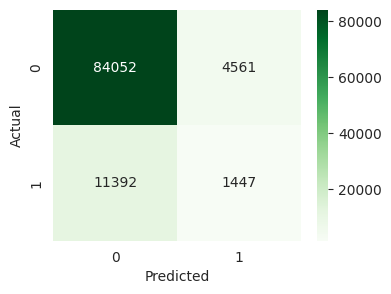

In [215]:
#KNeighborsClassifier
print("#KNeighborsClassifier")
print_score(knn_cla, X_train, y_train, X_test, y_test, train=True)
print_score(knn_cla, X_train, y_train, X_test, y_test, train=False)

Evaluation of RandomForestClassifier

#RandomForestClassifier
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.999976      1.000000  0.999979       0.999988       0.999979
recall          1.000000      0.999835  0.999979       0.999918       0.999979
f1-score        0.999988      0.999918  0.999979       0.999953       0.999979
support    206396.000000  30323.000000  0.999979  236719.000000  236719.000000
_______________________________________________
Confusion Matrix: 



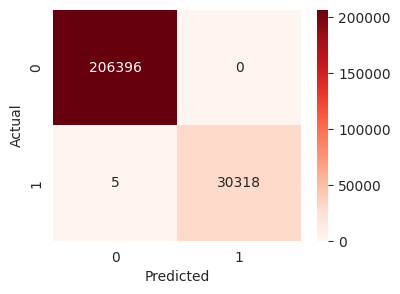

Test Result:
Accuracy Score: 91.66%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.940929      0.707319  0.916611       0.824124       0.911365
recall         0.965118      0.581821  0.916611       0.773469       0.916611
f1-score       0.952870      0.638462  0.916611       0.795666       0.913081
support    88613.000000  12839.000000  0.916611  101452.000000  101452.000000
_______________________________________________
Confusion Matrix: 



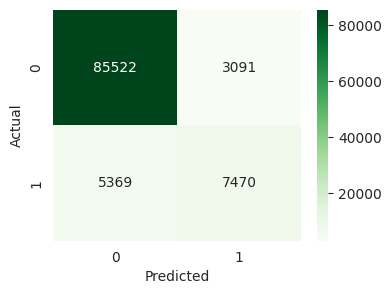

In [216]:
#RandomForestClassifier
print("#RandomForestClassifier")
print_score(rand_cl, X_train, y_train, X_test, y_test, train=True)
print_score(rand_cl, X_train, y_train, X_test, y_test, train=False)

Final Model Load

In [217]:
import joblib
# Save the model to a file
model_filename = '/content/drive/MyDrive/prediction.pkl'
joblib.dump(rand_cl, model_filename)

['/content/drive/MyDrive/prediction.pkl']

In [218]:
!pip install flask joblib pandas scikit-learn

In [222]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load('/content/drive/MyDrive/prediction.pkl')

# Function to take user input and make a prediction
def predict_hazardous(neo_id, name, absolute_magnitude, estimated_diameter_min, estimated_diameter_max, orbiting_body, relative_velocity, miss_distance):
    input_features = np.array([[absolute_magnitude, estimated_diameter_min, estimated_diameter_max, relative_velocity, miss_distance]])

    # Make a prediction
    prediction = model.predict(input_features)
    if prediction[0] == 0:
        print('All clear! This space traveler poses no danger to Earth.')
    else:
        print('Alert! This space traveler may pose danger to Earth.')

    # Return the result

# Get user input
neo_id = input("Enter NEO ID: ")
name = input("Enter Name: ")
absolute_magnitude = float(input("Enter Absolute Magnitude: "))
estimated_diameter_min = float(input("Enter Estimated Diameter Min: "))
estimated_diameter_max = float(input("Enter Estimated Diameter Max: "))
orbiting_body = input("Enter Orbiting Body: ")
relative_velocity = float(input("Enter Relative Velocity: "))
miss_distance = float(input("Enter Miss Distance: "))

# Make a prediction
predict_hazardous(neo_id, name, absolute_magnitude, estimated_diameter_min, estimated_diameter_max, orbiting_body, relative_velocity, miss_distance)



Enter NEO ID: 2349507
Enter Name: 349507 (2008 QY)
Enter Absolute Magnitude: 18.50
Enter Estimated Diameter Min: 0.530341
Enter Estimated Diameter Max: 1.185878
Enter Orbiting Body: Earth
Enter Relative Velocity: 109949.757148
Enter Miss Distance: 5.580105e+07
Alert! This space traveler may pose danger to Earth.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
